En análisis de datos, aproximadamente del 60% al 80% del tiempo es invertido en limpiar y organizar los datos, y con justa razón, pues la limpieza de datos es la etapa previa al interrogatorio que llevaremos a cabo posteriormente para obtener información. Este proceso rara vez se realiza en una sola ocasión, suele ser un proceso iterativo. En esta lectura, abordaremos algunos de los casos más comunes de "datos sucios" y cómo afrontarlos.

Nuestros Paquetes

* import pandas as pd   - Tratamiento de datos

* import numpy as np    - Biblioteca numerica de python

Paquetería nueva

* import [datetime](https://docs.python.org/3/library/datetime.html)       - Manejo y tratamiento de Fechas
* import [chardet ](https://pypi.org/project/chardet/)       - Modulo de Encoding para caracteres    



Nuestros Datasets

* Dataset Derrumbes By NASA (https://www.kaggle.com/nasa/landslide-events)
* Dataset Terremotos By Us Geological Survey (https://www.kaggle.com/usgs/earthquake-database)
* Dataset Fifa By Karan Gadiya (https://www.kaggle.com/karangadiya/fifa19/)
* Dataset Adult By Ronny Kohavi and Barry Becker (http://archive.ics.uci.edu/ml/datasets/Adult)
* Dataset Kickstarter By Mickaël Mouillé obtained with Kickstarter Platform API (https://www.kaggle.com/kemical/kickstarter-projects)

In [43]:
import pandas as pd
import numpy as np
import datetime
import chardet
import seaborn
import matplotlib.pyplot as plt

### 1. Leer datasets

In [4]:
earthquakes = pd.read_csv('D:/DEV.F/Modulo 2/datasets/terremotos.csv')
derrumbes = pd.read_csv('D:/DEV.F/Modulo 2/datasets/derrumbes.csv')
fifa = pd.read_csv('D:/DEV.F/Modulo 2/datasets/fifa.csv')
fifaM = pd.read_csv('D:/DEV.F/Modulo 2/datasets/fifaM.csv')
adult = pd.read_csv('D:/DEV.F/Modulo 2/datasets/adult.csv')
chavos_prepa = pd.read_csv('D:/DEV.F/Modulo 2/datasets/snsdata.csv')
accounts = pd.read_csv('D:/DEV.F/Modulo 2/datasets/accounts.csv')

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1,2,4,8,9,14,16,17,18,23,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## ¿Cómo manejar y transformar las fechas?

Primero vamos a ver en qué formato están guardadas con 
[.dtype ](https://numpy.org/doc/stable/reference/arrays.dtypes.html)

Data type objects

* 'b'       boolean
* 'i'       (signed) integer
* 'u'       unsigned integer
* 'f'       floating-point
* 'c'       complex-floating point
* 'O'       (Python) objects
* 'S', 'a'  (byte-)string
* 'U'       Unicode
* 'V'       raw data (void)


In [5]:
derrumbes.columns

Index(['id', 'date', 'time', 'continent_code', 'country_name', 'country_code',
       'state/province', 'population', 'city/town', 'distance',
       'location_description', 'latitude', 'longitude', 'geolocation',
       'hazard_type', 'landslide_type', 'landslide_size', 'trigger',
       'storm_name', 'injuries', 'fatalities', 'source_name', 'source_link'],
      dtype='object')

In [6]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

In [7]:
derrumbes.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [9]:
derrumbes.tail()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
1688,7535,12/7/15,NaN,NaN,United States,US,North Carolina,1646,Tryon,7.80866,...,"(35.221899999999998, -82.322599999999994)",Landslide,Rockfall,Small,NaN,NaN,0.0,0.0,Tryon Daily Bulletin,http://www.tryondailybulletin.com/2016/02/26/u...
1689,7537,2/22/16,0:00,NaN,United States,US,West Virginia,51400,Charleston,6.84721,...,"(38.398699999999998, -81.584800000000001)",Landslide,Mudslide,Small,Unknown,NaN,0.0,0.0,Charleston Gazette,http://www.wvgazettemail.com/news/20160222/us-...
1690,7539,2/23/16,NaN,NaN,United States,US,West Virginia,2406,Welch,14.19735,...,"(37.409599999999998, -81.4268)",Landslide,Landslide,Small,Rain,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/officials-cautio...
1691,7540,2/26/16,21:06,NaN,United States,US,West Virginia,1048,Athens,12.00678,...,"(37.501100000000001, -81.109300000000005)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/rockslide-snarls...
1692,7541,3/2/16,8:00,NaN,United States,US,Vermont,2066,Windsor,1.78429,...,"(43.4771, -72.406599999999997)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Valley News,http://www.vnews.com/home/21353539-95/loose-ledge


In [10]:
# dtype: object Pandas usa el Object para referirse a varios tipos de datos pero normalmente son strings
derrumbes['date'].dtype

dtype('O')

[**to_datetime()** ](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) es un método que ayuda a convertir string en un formato de date que puede leer python como fechas

**Syntax**:

pandas.to_datetime(arg, format=None, ...)

 
Parameters:

* arg: An integer, string, float, list or dict object to convert in to Date time object.
* format: String input to tell position of day, month and year.

In [11]:
derrumbes['date']=pd.to_datetime(derrumbes['date'],format='%m/%d/%y')

In [13]:
derrumbes['date'].dtype

dtype('<M8[ns]')

In [14]:
derrumbes['date'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date, dtype: datetime64[ns]

In [33]:
#existen registros con fechas nulas?
dias_de_derrumbes=derrumbes['date'].dt.day

In [35]:
derrumbes['date'].isnull().sum()
dias_de_derrumbes=dias_de_derrumbes.dropna()

In [19]:
#Podemos interactuar con las partes de la fecha
derrumbes['date'].dt.day.iloc[0]

2.0

Text(0.5, 1.0, 'Distribucion de Dias de Derrumbes')

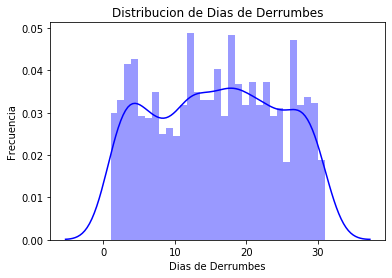

In [45]:
# Grafiquemos para double-check
# doesn't hurt to double-check that the days of the month we've extracted make sense.
seaborn.distplot(dias_de_derrumbes, kde=True, bins=31,color='blue',label='Dias de Derrumbes')
plt.xlabel('Dias de Derrumbes')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Dias de Derrumbes')

* Crea una nueva columna llamada 'mes_derrumbes' que muestre los meses de la columna date_parsed en que sucedieron los derrumbes.
* Después muestra de esa columna los datos del mes.

c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Distribucion de Meses de Derrumbes')

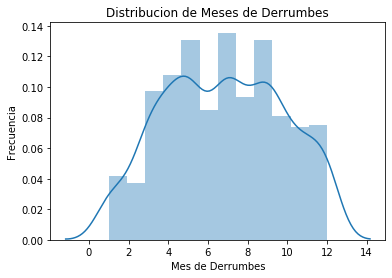

In [47]:
mes_derrumbes=derrumbes['date'].dt.month
seaborn.distplot(mes_derrumbes,bins=12)
plt.xlabel('Mes de Derrumbes')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Meses de Derrumbes')

### ¿Qué pasa si la fecha de un Dataset viene en varios Formatos???


Entonces usaremos el parámetro de **infer_datetime_format=True**
de la función **to_datetime**

In [48]:
accounts.head()

,Unnamed: 0,id,date_opened,total
0,1,A880C79F,2003-10-19,169305
1,2,BE8222DF,"October 05, 2018",107460
2,3,19F9E113,2008-07-29,15297152
3,4,A2FE52A3,2005-06-09,14897272
4,5,F6DC2C08,2012-03-31,124568


In [49]:
accounts.columns

Index(['Unnamed: 0', 'id', 'date_opened', 'total'], dtype='object')

In [50]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
Unnamed: 0     98 non-null int64
id             98 non-null object
date_opened    98 non-null object
total          98 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.1+ KB


In [52]:
accounts['date_opened'].head()

0          2003-10-19
1    October 05, 2018
2          2008-07-29
3          2005-06-09
4          2012-03-31
Name: date_opened, dtype: object

In [54]:
accounts['date_opened']=pd.to_datetime(accounts['date_opened'],infer_datetime_format=True)
accounts['date_opened'].head()

0   2003-10-19
1   2018-10-05
2   2008-07-29
3   2005-06-09
4   2012-03-31
Name: date_opened, dtype: datetime64[ns]

### Remover y reemplazar  y modificar caracteres no deseados
Otro problema común es la presencia de caracteres que no deseamos en nuestros valores. Estos pueden constituir alguno de los siguientes casos:
 - Caracteres erróneos introducidos por error humano o error de máquina al realizar los registros.
 - Caracteres que fueron introducidos para indicar una divisa, unidad de medida, categoría, etc. O bien para simplificar los datos.
 - Caracteres erróneos introducidos por una cambio en la codificación de nuestro sistema respecto a la codificación de los datos.